
# PCA to estimating ^DJI 


- Principal component analysis (PCA) is an unsupervised Machine Learning algorithm based on a well-established mathematical technique that data scientists use for visualization and complex data pre-processing in Exploratory Data Analysis  


- Dow Jones Industrial Average (^DJI) is a stock market index that measures the stock performance of 30 large companies listed on US stock exchanges



In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA


### The Dow Jones index consists of the following companies, weighted as shown:

% Weight of each stocks in the Dow Jones index

In [2]:
weights = pd.read_csv('C:/Users/K/Desktop/finance/weight.csv')
weights

,Stock,Weight
0,United Health Group,7.75
1,Goldman Sachs,6.77
2,Home Depot,6.29
3,Microsoft,4.90
4,Amgen,4.65
5,McDonalds,4.59
6,Boeing,4.55
7,Visa A,4.54
8,Salesforce.com,4.47
9,Caterpillar,4.43


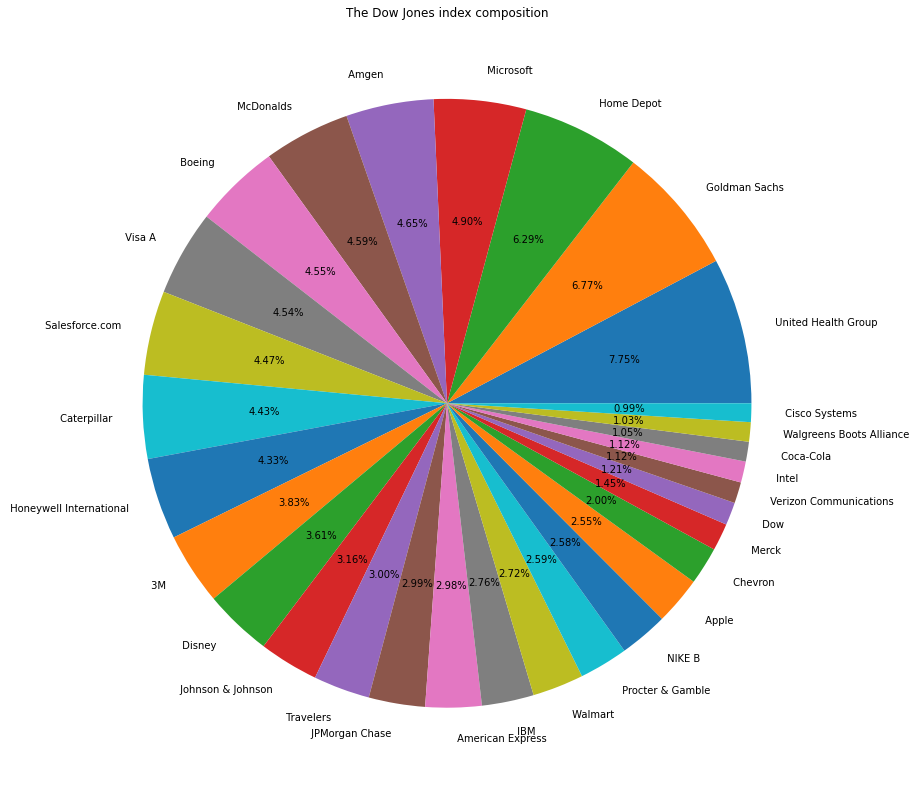

In [3]:
#Pie chart

plt.figure(figsize = (14,14))
stock = weights['Stock']
weight = weights[' Weight']
plt.pie(weight, labels=stock, autopct = "%0.2f%%")
plt.title("The Dow Jones index composition")
plt.show()

In [4]:
# Tickers list for the 30 stocks contained in the Dow Jones index: 

tickers=["MMM","AXP","AMGN","AAPL","BA","CAT","CVX","CSCO","KO","DOW","GS","HD","HON","IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PG","CRM","TRV","UNH","VZ","V","WMT","WBA","DIS"]


In [5]:
def get_price(stock, start, end):
    return pdr.get_data_yahoo(stock, start, end)['Adj Close']

prices = pd.DataFrame({n: get_price(n, "2020-01-01", "2021-05-01") for n in tickers})


In [6]:
prices.tail()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,199.630005,150.339996,255.520004,134.720001,241.440002,230.559998,101.519997,51.639999,53.660000,62.200001,...,131.600006,131.259995,235.460007,155.729996,395.859985,56.939999,230.339996,137.910004,52.730000,184.270004
2021-04-27,194.449997,150.360001,255.130005,134.389999,242.470001,230.339996,102.699997,51.369999,53.580002,62.650002,...,132.110001,131.179993,234.210007,155.199997,394.500000,56.320000,229.910004,138.380005,52.509998,184.639999
2021-04-28,195.929993,152.539993,236.710007,133.580002,235.460007,232.300003,105.220001,51.110001,53.590000,63.310001,...,130.710007,131.399994,236.880005,153.789993,394.589996,56.430000,233.449997,137.889999,52.400002,183.389999
2021-04-29,199.050003,154.630005,234.710007,133.479996,235.940002,227.470001,106.900002,51.459999,54.259998,64.059998,...,133.259995,132.509995,234.360001,155.699997,401.549988,57.320000,236.860001,139.630005,52.740002,185.330002
2021-04-30,197.139999,153.350006,239.639999,131.460007,234.309998,228.110001,103.070000,50.910000,53.980000,62.500000,...,132.619995,133.419998,230.320007,154.660004,398.799988,57.790001,233.559998,139.910004,53.099998,186.020004


In [7]:
#Dow Jones index since Jan 1, 2020

dow = pdr.get_data_yahoo('^DJI', '2020-01-01')
dow['Adj Close']

Date
2020-01-02    28868.800781
2020-01-03    28634.880859
2020-01-06    28703.380859
2020-01-07    28583.679688
2020-01-08    28745.089844
                  ...     
2021-04-26    33981.570312
2021-04-27    33984.929688
2021-04-28    33820.378906
2021-04-29    34060.359375
2021-04-30    33874.851562
Name: Adj Close, Length: 335, dtype: float64

## PCA algorithm
    

Before using PCA, standardize data:

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#i.e., all 30 dimensions are centered around 0 and have a std=1
standardize= lambda x: (x-x.mean())/x.std()


In [9]:
pca = KernelPCA().fit(prices.apply(standardize))

Next, calculate the covariance matrix for the resulting centered matrix and use eigenvalue decomposition to transform it 

Eigenvalues

In [10]:
#Eigenvalues in decreasing order

pca.lambdas_

array([6.21586467e+03, 1.77591488e+03, 7.60694717e+02, 4.64820520e+02,
       1.83698402e+02, 1.01053474e+02, 9.79234575e+01, 8.33115340e+01,
       6.33920393e+01, 4.27256483e+01, 3.75664754e+01, 3.09388318e+01,
       2.72267449e+01, 2.37714486e+01, 1.96622148e+01, 1.91377834e+01,
       1.18617362e+01, 1.09772367e+01, 8.80880402e+00, 8.11245478e+00,
       7.61083546e+00, 5.03029673e+00, 4.84403087e+00, 3.51835339e+00,
       2.71565933e+00, 2.52321407e+00, 2.01458519e+00, 1.71918793e+00,
       1.36872678e+00, 1.19203860e+00])

## Explained Variance

The first Principal Component alone accounts for 62% percent of the variance in the 30 time series:

In [11]:
normalize= lambda x:x/x.sum()
normalize(pca.lambdas_)[:6]

array([0.62034578, 0.17723701, 0.07591764, 0.04638927, 0.01833317,
       0.01008518])

In [12]:
eig_vals = normalize(pca.lambdas_)[:6]
for i in eig_vals:
    print(i)

0.6203457756290981
0.17723701379356546
0.07591763645402744
0.046389273403220445
0.01833317382009216
0.010085177010256427


The first 6 Principal Components combined explain 94.8% of the variability:

In [13]:
tot = sum(eig_vals)
tot

0.94830805011026

### Pareto Chart

Pareto chart contains a bar & line graph where individual components are represented in descending order by bars and 
the cumulative total is represented by the line. 

Why Pareto? Pareto Principle. According to Pareto Principle aka the law of the vital few or the 80/20 rule: Roughly 80% of consequences come from 20% of the causes.


On the Pareto chart below (adopted from S.R.) it's easy to see that the first Principal Component alone accounts for more than 60% of the variability, and that the first 6 Principla Components (20%) explain most of the variance in the 30 time series.

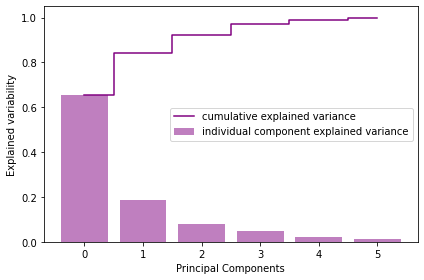

In [14]:
var = [(i/tot) for i in eig_vals]
cum = np.cumsum(var)

plt.bar(range(6), var, alpha=0.5, align='center', color = 'purple', label='individual component explained variance')
plt.step(range(6), cum, where='mid', color = 'purple', label='cumulative explained variance')
plt.ylabel('Explained variability')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()


In [15]:
pca = KernelPCA(n_components=6).fit(prices.apply(standardize))
PC6 = pca.transform(-prices)
w =normalize(pca.lambdas_)
prices['PCA_6'] = np.dot(PC6, w)

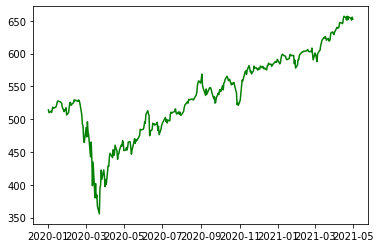

In [16]:
#PC_6

plt.plot(prices['PCA_6'], color='g')

<AxesSubplot:xlabel='Date'>

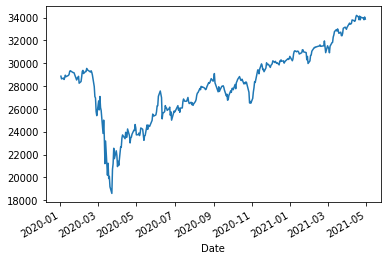

In [17]:
# ^DJI 
dow['Adj Close'].plot()

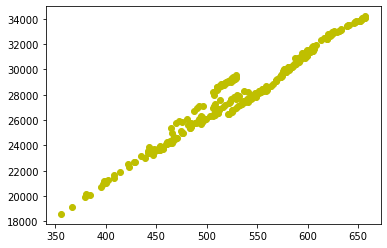

In [18]:
# The relationship: Dow Jones index & our PCA index

plt.scatter(prices['PCA_6'],dow['Close'], color ='y')